# Unit 5 - Financial Planning

In [114]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [115]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [116]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [117]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [118]:
#btc_data = requests.get(btc_url)
#my_btc_value = btc_price.content
#print(my_btc_value)


In [119]:
'''
btc_data = requests.get(btc_url)
btc = btc_data.json()
print(json.dumps(btc, indent=4))
btc_price = btc['data']['1']['quotes']['USD']['price']
print(btc_price)
'''

"\nbtc_data = requests.get(btc_url)\nbtc = btc_data.json()\nprint(json.dumps(btc, indent=4))\nbtc_price = btc['data']['1']['quotes']['USD']['price']\nprint(btc_price)\n"

In [120]:
'''
eth_data = requests.get(eth_url)
eth = eth_data.json()
print(json.dumps(eth, indent=4))
eth_price = eth['data']['1027']['quotes']['USD']['price']
print(eth_price)
'''

"\neth_data = requests.get(eth_url)\neth = eth_data.json()\nprint(json.dumps(eth, indent=4))\neth_price = eth['data']['1027']['quotes']['USD']['price']\nprint(eth_price)\n"

In [121]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc = btc_data.json()
btc_price = btc['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url)
eth = eth_data.json()
eth_price = eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $48568.80
The current value of your 5.3 ETH is $16248.42


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [122]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [123]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [124]:
# Format current date as ISO format
today = pd.Timestamp("2022-04-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio.head()

# Reorganize the DataFrame

# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
df_portfolio

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-04-14 04:00:00+00:00  104.73  104.74  103.93  103.97  8505987   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2022-04-14 04:00:00+00:00       30443  104.171733  443.44  444.7301  437.68   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-14 04:00:00+00:00  437.79  98667135      703727  440.305786

In [125]:
# Pick AGG and SPY close prices
df_close = pd.DataFrame()

agg_close_price = df_portfolio['AGG']['close'].item()
spy_close_price = df_portfolio['SPY']['close'].item()

#df_close['AGG'] = df_portfolio['AGG']['close'].item()
#df_close['SPY'] = df_portfolio['SPY']['close'].item()

#df_close.index = df_close.index.date

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $103.97
Current SPY closing price: $437.79


In [126]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21889.50
The current value of your 200 AGG shares is $20794.00


### Savings Health Analysis

In [152]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
financial_assets_data = {'Total': [my_agg_value + my_spy_value, my_btc_value + my_eth_value]}
# Create savings DataFrame
df_savings = pd.DataFrame(financial_assets_data, index= ['Shares', 'Crypto'])

# Display savings DataFrame
df_savings

,Total
Shares,42683.500
Crypto,64817.222


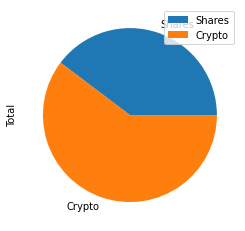

In [128]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True);

In [129]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
#emergency_fun = monthly_income * 100 - test line to see if 'else' prints

# Calculate total amount of savings
total_savings = df_savings.sum().item()
#savings_dollar = "{:.2f}".format(total_savings)

# Validate saving health
if total_savings > emergency_fund:
    #print(f"You have ${savings_dollar - emergency_fund} more saved than your ideal emergency fund. Great job!") - Man... I really wanted this to work but for now, if I have time, I'll come back this.
    print("Your total savings amount is greater than your emergency fund.  Great job!")
elif total_savings == emergency_fund:
    print("Your total savings amount is equal to your emergency fund.  It is safe to start investing.")
else:
    print("You do not have enough saved.  Please fill the emergency fund before investing.")


Your total savings amount is greater than your emergency fund.  Great job!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [130]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-04-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-14', tz='America/New_York').isoformat()
'''
dont need to add 'timeframe' as it is already established up top at 1day.
same goes for 'tickers'
'''

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [131]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start= start_date,
    end=end_date,
).df

# Reorganize the DataFrame
# Separate ticker data
R_AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
R_SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([R_AGG, R_SPY], axis=1, keys=['AGG', 'SPY'])
df_stock_data.index = df_stock_data.index.date


# Display sample data
df_stock_data.head()

AGG                                                             \
              open      high     low   close   volume trade_count        vwap   
2017-04-17  109.30  109.4000  109.18  109.21  1646056        7973  109.294030   
2017-04-18  109.41  109.7000  109.39  109.65  2369862       14488  109.579396   
2017-04-19  109.47  109.5600  109.39  109.48  2148531        9587  109.455386   
2017-04-20  109.31  109.4000  109.20  109.31  1867805        7319  109.301387   
2017-04-21  109.40  109.4899  109.30  109.34  1539265        8708  109.386803   

               SPY                                                              
              open     high     low   close     volume trade_count        vwap  
2017-04-17  233.12  234.570  232.88  234.57   68405367      213643  233.870859  
2017-04-18  233.71  234.490  233.08  233.87   83225836      245279  233.958942  
2017-04-19  234.52  234.950  233.18  233.44   68699868      248643  233.953779  
2017-04-20  234.14  235.845  233.78  235.34   92572186      279885  234.978432  
2017-04-21  235.22  235.310  234.13  234.59  110389847      258915  234.784238

In [132]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)
'''
For the weights, I just took the 50 spy share value and divided it to the total share values.  Came out 51% and AGG was 49%

Correction, I just read the readme and it said to do a 40/60 (bonds/stocks) split.
'''

'\nFor the weights, I just took the 50 spy share value and divided it to the total share values.  Came out 51% and AGG was 49%\n\nCorrection, I just read the readme and it said to do a 40/60 (bonds/stocks) split.\n'

In [133]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                                             \
              open      high     low   close   volume trade_count        vwap   
2017-04-17  109.30  109.4000  109.18  109.21  1646056        7973  109.294030   
2017-04-18  109.41  109.7000  109.39  109.65  2369862       14488  109.579396   
2017-04-19  109.47  109.5600  109.39  109.48  2148531        9587  109.455386   
2017-04-20  109.31  109.4000  109.20  109.31  1867805        7319  109.301387   
2017-04-21  109.40  109.4899  109.30  109.34  1539265        8708  109.386803   

                            SPY                                      \
           daily_return    open     high     low   close     volume   
2017-04-17          NaN  233.12  234.570  232.88  234.57   68405367   
2017-04-18     0.004029  233.71  234.490  233.08  233.87   83225836   
2017-04-19    -0.001550  234.52  234.950  233.18  233.44   68699868   
2017-04-20    -0.001553  234.14  235.845  233.78  235.34   92572186   
2017-04-21     0.000274  235.22  235.310  234.13  234.59  110389847   

                                                 
           trade_count        vwap daily_return  
2017-04-17      213643  233.870859          NaN  
2017-04-18      245279  233.958942    -0.002984  
2017-04-19      248643  233.953779    -0.001839  
2017-04-20      279885  234.978432     0.008139  
2017-04-21      258915  234.784238    -0.003187

In [134]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brianchang/Rutgers/Rutgers-Class/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013439,0.998465,0.990240,0.991329,1.002163,1.001784,0.992818,0.985617,0.997028,0.994696,...,0.983613,0.994256,1.013095,1.013587,0.991418,0.996350,0.994344,0.983632,0.987297,1.017074
2,1.008001,1.000629,0.996300,0.988221,1.005067,1.004858,0.989976,0.986245,0.997792,0.979556,...,0.984922,0.998454,1.021459,1.013521,0.996944,0.988615,1.006515,0.991963,0.994844,1.015737
3,1.015044,1.000352,1.004064,0.987423,1.014691,0.995067,0.996360,0.992697,0.997641,0.968774,...,0.982890,0.996792,1.020533,1.014565,0.985602,0.988591,1.007085,0.996924,0.985359,1.020763
4,1.011610,0.992730,0.995845,0.986443,1.009422,1.005638,0.994315,0.984360,1.004162,0.968978,...,0.992241,1.000915,1.018595,1.018819,0.976527,1.005643,0.998673,0.988924,0.972928,1.024742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.905326,15.408870,26.123149,7.170628,9.303349,9.795333,17.249079,8.585658,3.369887,8.464281,...,19.068717,3.629035,4.538227,10.156385,20.834934,11.439864,15.141577,5.105600,11.311243,2.826805
7557,8.803676,15.413476,26.354262,7.138795,9.437424,9.684798,17.208387,8.455209,3.385471,8.385289,...,19.200638,3.624243,4.535144,10.220353,20.839563,11.443875,14.974189,5.086737,11.372956,2.829694
7558,8.821784,15.374842,26.279058,7.203900,9.302051,9.744125,17.117534,8.374726,3.341121,8.377936,...,19.195110,3.656397,4.514536,10.038979,20.795298,11.427942,14.970897,5.125006,11.285563,2.855549
7559,8.766011,15.466146,26.247399,7.267725,9.241050,9.809511,16.985770,8.314129,3.385762,8.389529,...,19.100383,3.647801,4.523969,10.012768,20.858798,11.599337,15.013088,5.125142,11.314663,2.859883


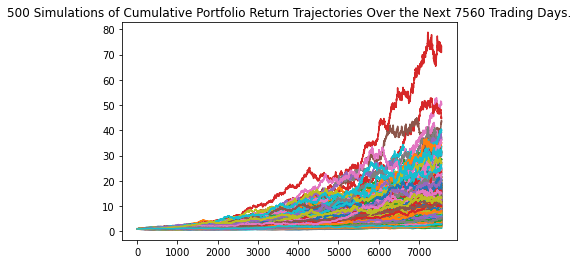

In [135]:
# Plot simulation outcomes
line_plt = MC_thirtyyear.plot_simulation()

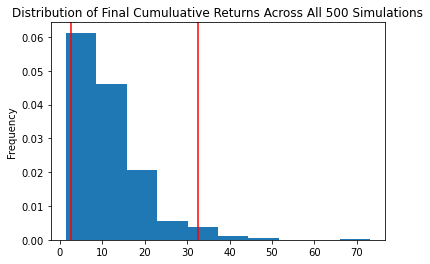

In [136]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [137]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean             11.667343
std               8.153133
min               1.364224
25%               5.965335
50%               9.561484
75%              15.114166
max              73.186188
95% CI Lower      2.557150
95% CI Upper     32.585840
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [138]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $51143.01 and $651716.8


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [139]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
#ci_lower = round(tbl[8]*30000,2)
#ci_upper = round(tbl[9]*30000,2)

ci_lower = round(tbl[8]*(initial_investment),2) #i think this way is better than just typing in 30,000
ci_upper = round(tbl[9]*(initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")



There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $76714.51 and $977575.2


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [140]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [0, 1],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear.portfolio_data.head(-5)

AGG                                                   \
              open      high      low   close    volume trade_count   
2017-04-17  109.30  109.4000  109.180  109.21   1646056        7973   
2017-04-18  109.41  109.7000  109.390  109.65   2369862       14488   
2017-04-19  109.47  109.5600  109.390  109.48   2148531        9587   
2017-04-20  109.31  109.4000  109.200  109.31   1867805        7319   
2017-04-21  109.40  109.4899  109.300  109.34   1539265        8708   
...            ...       ...      ...     ...       ...         ...   
2022-04-01  106.35  106.9500  106.250  106.75  11579091       40126   
2022-04-04  106.87  106.8700  106.560  106.84   9956493       32544   
2022-04-05  106.60  106.6250  105.740  105.76  11018430       34684   
2022-04-06  105.20  105.8050  105.115  105.49  13322630       47090   
2022-04-07  105.38  105.5100  105.130  105.26   7921117       25631   

                                        SPY                           \
                  vwap daily_return    open     high     low   close   
2017-04-17  109.294030          NaN  233.12  234.570  232.88  234.57   
2017-04-18  109.579396     0.004029  233.71  234.490  233.08  233.87   
2017-04-19  109.455386    -0.001550  234.52  234.950  233.18  233.44   
2017-04-20  109.301387    -0.001553  234.14  235.845  233.78  235.34   
2017-04-21  109.386803     0.000274  235.22  235.310  234.13  234.59   
...                ...          ...     ...      ...     ...     ...   
2022-04-01  106.667931    -0.003268  453.30  453.460  449.14  452.92   
2022-04-04  106.739298     0.000843  453.20  456.910  452.26  456.80   
2022-04-05  105.931526    -0.010109  455.23  457.830  449.82  451.03   
2022-04-06  105.463015    -0.002553  446.87  448.930  443.47  446.52   
2022-04-07  105.278761    -0.002180  445.67  450.690  443.53  448.77   

                                                            
               volume trade_count        vwap daily_return  
2017-04-17   68405367      213643  233.870859          NaN  
2017-04-18   83225836      245279  233.958942    -0.002984  
2017-04-19   68699868      248643  233.953779    -0.001839  
2017-04-20   92572186      279885  234.978432     0.008139  
2017-04-21  110389847      258915  234.784238    -0.003187  
...               ...         ...         ...          ...  
2022-04-01   88676014      624745  451.850848     0.001792  
2022-04-04   59663209      503316  455.309774     0.008567  
2022-04-05   74022189      644313  453.412462    -0.012631  
2022-04-06  105592595      901634  446.345270    -0.009999  
2022-04-07   77538519      628673  447.098209     0.005039  

[1255 rows x 16 columns]

In [141]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brianchang/Rutgers/Rutgers-Class/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998964,0.995134,1.007380,0.999213,0.998608,1.003190,0.979264,1.003896,1.015093,1.006762,...,0.994879,0.996921,1.018178,1.007179,1.003714,1.001982,1.010065,0.988929,0.994963,1.010108
2,0.985173,1.007746,1.022179,0.995917,0.992182,0.989650,0.994734,1.013263,1.019442,1.034139,...,0.984717,1.002809,1.026938,0.989771,0.987528,0.965290,0.995064,0.965993,1.015811,1.009990
3,1.005498,1.022731,1.035009,1.009153,0.986908,0.995325,0.986992,1.014877,1.028548,1.042767,...,0.992536,1.000132,1.027984,0.994524,0.992394,0.955233,0.992545,0.974219,1.020189,1.012665
4,1.006149,1.021092,1.042749,1.009068,0.998622,0.978421,0.989452,1.025328,1.020418,1.045977,...,0.972497,0.994294,1.041437,0.984560,0.984264,0.958359,1.012981,0.972407,0.986886,1.026422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.972008,2.984162,2.011687,2.904159,1.514771,1.675641,2.383413,2.796317,4.606604,1.932331,...,0.878618,0.711219,2.887792,1.181475,2.148557,3.510712,1.809006,2.161723,1.321511,1.021569
1257,2.928680,2.953479,2.021396,2.930182,1.514190,1.678827,2.321051,2.834219,4.603020,1.917817,...,0.864530,0.706752,2.867779,1.180288,2.143083,3.528343,1.831769,2.146017,1.324384,1.025457
1258,2.947911,2.901078,2.025329,2.927699,1.515775,1.651837,2.317684,2.770686,4.543937,1.895555,...,0.856837,0.718635,2.867382,1.189428,2.177401,3.557611,1.802056,2.096188,1.344298,1.036712
1259,2.911841,2.870472,2.066427,2.950361,1.523737,1.660625,2.293310,2.764277,4.507320,1.894489,...,0.862896,0.718618,2.894609,1.189894,2.199415,3.656561,1.773819,2.081646,1.373060,1.028071


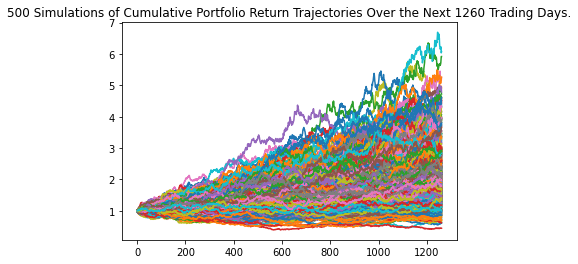

In [142]:
# Plot simulation outcomes
line_plt_5 = MC_fiveyear.plot_simulation()

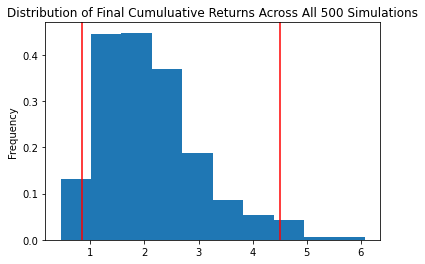

In [143]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_fiveyear.plot_distribution()

In [144]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
tbl_5

count           500.000000
mean              2.104156
std               0.927030
min               0.446850
25%               1.420713
50%               1.932223
75%               2.559483
max               6.076913
95% CI Lower      0.839190
95% CI Upper      4.501100
Name: 1260, dtype: float64

In [145]:
# Set initial investment
initial_investment_5y = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5[8]*(initial_investment_5y),2)
ci_upper_five = round(tbl_5[9]*(initial_investment_5y),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5y} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $50351.43 and $270065.98


### Ten Years Retirement Option

In [146]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [.1, .9],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyear.portfolio_data.head(-5)

AGG                                                   \
              open      high      low   close    volume trade_count   
2017-04-17  109.30  109.4000  109.180  109.21   1646056        7973   
2017-04-18  109.41  109.7000  109.390  109.65   2369862       14488   
2017-04-19  109.47  109.5600  109.390  109.48   2148531        9587   
2017-04-20  109.31  109.4000  109.200  109.31   1867805        7319   
2017-04-21  109.40  109.4899  109.300  109.34   1539265        8708   
...            ...       ...      ...     ...       ...         ...   
2022-04-01  106.35  106.9500  106.250  106.75  11579091       40126   
2022-04-04  106.87  106.8700  106.560  106.84   9956493       32544   
2022-04-05  106.60  106.6250  105.740  105.76  11018430       34684   
2022-04-06  105.20  105.8050  105.115  105.49  13322630       47090   
2022-04-07  105.38  105.5100  105.130  105.26   7921117       25631   

                                        SPY                           \
                  vwap daily_return    open     high     low   close   
2017-04-17  109.294030          NaN  233.12  234.570  232.88  234.57   
2017-04-18  109.579396     0.004029  233.71  234.490  233.08  233.87   
2017-04-19  109.455386    -0.001550  234.52  234.950  233.18  233.44   
2017-04-20  109.301387    -0.001553  234.14  235.845  233.78  235.34   
2017-04-21  109.386803     0.000274  235.22  235.310  234.13  234.59   
...                ...          ...     ...      ...     ...     ...   
2022-04-01  106.667931    -0.003268  453.30  453.460  449.14  452.92   
2022-04-04  106.739298     0.000843  453.20  456.910  452.26  456.80   
2022-04-05  105.931526    -0.010109  455.23  457.830  449.82  451.03   
2022-04-06  105.463015    -0.002553  446.87  448.930  443.47  446.52   
2022-04-07  105.278761    -0.002180  445.67  450.690  443.53  448.77   

                                                            
               volume trade_count        vwap daily_return  
2017-04-17   68405367      213643  233.870859          NaN  
2017-04-18   83225836      245279  233.958942    -0.002984  
2017-04-19   68699868      248643  233.953779    -0.001839  
2017-04-20   92572186      279885  234.978432     0.008139  
2017-04-21  110389847      258915  234.784238    -0.003187  
...               ...         ...         ...          ...  
2022-04-01   88676014      624745  451.850848     0.001792  
2022-04-04   59663209      503316  455.309774     0.008567  
2022-04-05   74022189      644313  453.412462    -0.012631  
2022-04-06  105592595      901634  446.345270    -0.009999  
2022-04-07   77538519      628673  447.098209     0.005039  

[1255 rows x 16 columns]

In [147]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brianchang/Rutgers/Rutgers-Class/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.978798,0.992464,1.005239,1.008946,1.016544,0.978635,1.007898,0.988313,0.978766,0.999331,...,1.008737,0.998915,0.985697,1.000546,1.011991,1.022719,1.015651,0.985616,0.997115,0.991888
2,0.963579,0.992683,1.005332,1.025828,1.025511,0.992163,1.019533,0.989947,0.970255,1.012797,...,0.992142,1.001489,0.967110,0.990799,1.020480,1.018271,1.017958,0.993465,1.013069,0.977166
3,0.970147,0.988604,1.011267,1.036951,1.042050,0.999447,1.018853,0.983655,0.976173,1.028950,...,0.979397,1.001726,0.983053,0.992970,1.026283,1.010568,1.025993,0.987070,1.007029,0.967900
4,0.979684,0.969413,1.020008,1.049976,1.033360,1.005198,1.024352,0.995466,0.966485,1.025341,...,0.991285,0.980691,0.986355,0.999150,1.036046,1.028479,1.018259,0.991917,1.004507,0.967523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.114847,7.248508,5.407878,4.291320,2.583937,2.863025,5.313770,3.512637,2.416630,3.566684,...,3.671193,3.889413,4.015559,3.900362,1.466741,5.357347,2.990546,3.502636,3.601853,3.640665
2517,3.102415,7.184627,5.427804,4.333515,2.611590,2.890265,5.284190,3.505197,2.453980,3.581291,...,3.647303,3.868175,4.003163,3.899687,1.440494,5.254341,2.960802,3.483149,3.624149,3.645824
2518,3.067735,7.151028,5.478360,4.340930,2.642716,2.822027,5.322001,3.479416,2.445000,3.606150,...,3.648877,3.925658,4.008288,3.872499,1.421964,5.284826,2.857904,3.511665,3.581131,3.611235
2519,3.064453,7.264948,5.499794,4.332449,2.721896,2.796501,5.397255,3.479307,2.454060,3.632616,...,3.617828,3.985410,4.112732,3.954438,1.420499,5.359015,2.832172,3.536520,3.584534,3.636244


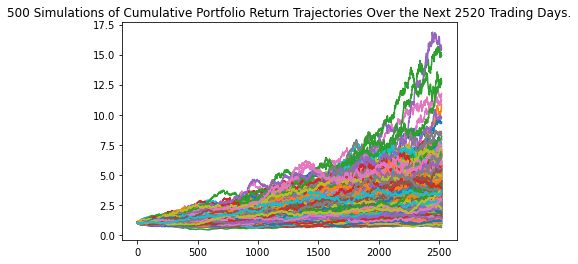

In [148]:
# Plot simulation outcomes
line_plt_10 = MC_tenyear.plot_simulation()

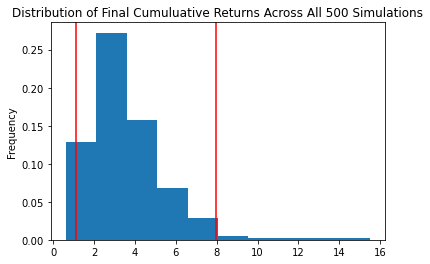

In [149]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_tenyear.plot_distribution()

In [150]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
tbl_10

count           500.000000
mean              3.563975
std               1.949415
min               0.606568
25%               2.260559
50%               3.225669
75%               4.331638
max              15.519323
95% CI Lower      1.115399
95% CI Upper      7.952130
Name: 2520, dtype: float64

In [151]:
# Set initial investment
initial_investment_10y = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10[8]*(initial_investment_10y),2)
ci_upper_ten = round(tbl_10[9]*(initial_investment_10y),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10y} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $66923.92 and $477127.78


# Conclusion #

In order to have some sort of parody with the 30y retirement plan's potential returns, I set the weights of the stocks and bonds heavily in the stocks side.  Given the short time frame, it is nearly impossible to have a reasonably balanced portfolio and expect to receive the same amount of potential gains as a 30y retirement plan.